In [9]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

# --------------------------
# 1. Load Data & Initial Checks
# --------------------------

df = pd.read_csv("sp500_companies.csv")
df.head()


,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
2,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309



Missing values count:
3

Revenue growth statistics:
count    499.000000
mean       0.070541
std        0.180247
min       -0.602000
10%       -0.052000
25%        0.002000
50%        0.051000
75%        0.109000
90%        0.189800
max        1.632000
Name: Revenuegrowth, dtype: float64


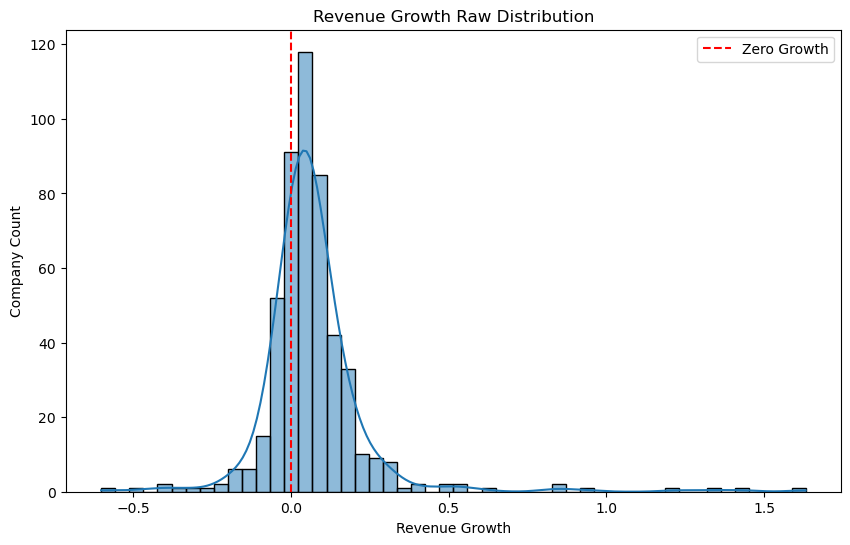

In [13]:

# --------------------------
# 2. Data Exploration & Statistics
# --------------------------
# Check for missing values
print("\nMissing values count:")
print(df["Revenuegrowth"].isnull().sum())

# Drop rows with missing values (choose handling method as needed)
df = df.dropna(subset=["Revenuegrowth"])

# Descriptive statistics
desc = df["Revenuegrowth"].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
print("\nRevenue growth statistics:")
print(desc)

# Visualize raw distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Revenuegrowth"], bins=50, kde=True)
plt.title("Revenue Growth Raw Distribution")
plt.xlabel("Revenue Growth")
plt.ylabel("Company Count")
plt.axvline(0, color='red', linestyle='--', label='Zero Growth')
plt.legend()
plt.show()


In [14]:

# --------------------------
# 3. Define Categorization Logic
# --------------------------
def categorize_revenue_growth(growth):
    """Convert continuous growth rate into categorical labels"""
    if growth < 0:
        return "Declining"
    elif 0 <= growth < 0.05:    # 0-5%
        return "Low Growth"
    elif 0.05 <= growth < 0.15: # 5-15%
        return "Moderate Growth"
    elif 0.15 <= growth < 0.30: # 15-30%
        return "High Growth"
    else:                       # >30%
        return "Hyper Growth"

# Apply categorization
df["Growth Category"] = df["Revenuegrowth"].apply(categorize_revenue_growth)



Category distribution percentages:
Growth Category
Declining          0.248497
High Growth        0.116232
Hyper Growth       0.046092
Low Growth         0.250501
Moderate Growth    0.338677
Name: proportion, dtype: float64


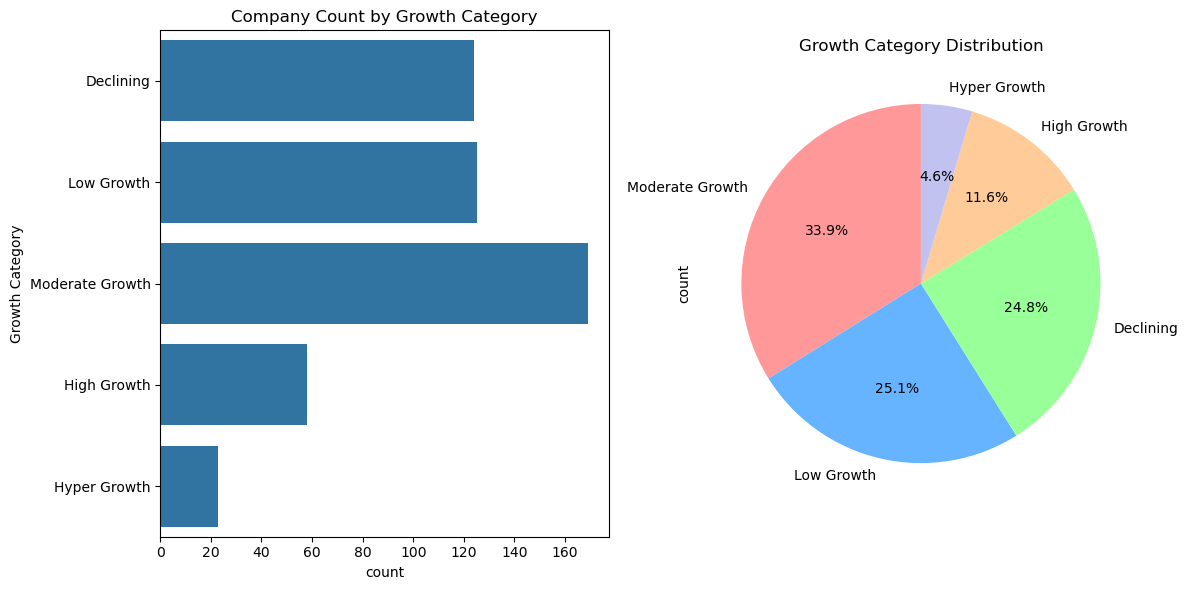

In [15]:

# --------------------------
# 4. Analyze Categorization Results
# --------------------------
# Category distribution statistics
category_counts = df["Growth Category"].value_counts(normalize=True).sort_index()
print("\nCategory distribution percentages:")
print(category_counts)

# Visualize categorization results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, y="Growth Category", 
              order=["Declining", "Low Growth", "Moderate Growth", 
                     "High Growth", "Hyper Growth"])
plt.title("Company Count by Growth Category")

plt.subplot(1, 2, 2)
df["Growth Category"].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'],
    startangle=90)
plt.title("Growth Category Distribution")
plt.tight_layout()
plt.show()


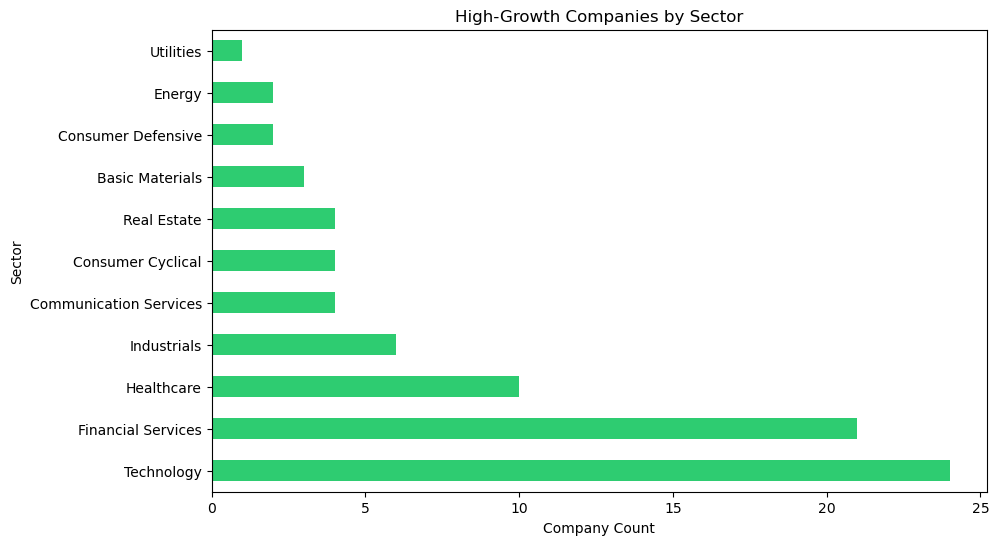

In [16]:

# --------------------------
# 5. Advanced Analysis (Cross-validate by Sector)
# --------------------------
if "Sector" in df.columns:
    # Count high-growth companies by sector
    growth_by_sector = (
        df[df["Growth Category"].isin(["High Growth", "Hyper Growth"])]
        .groupby("Sector")["Symbol"]
        .nunique()
        .sort_values(ascending=False)
    )
    
    plt.figure(figsize=(10, 6))
    growth_by_sector.plot(kind='barh', color='#2ecc71')
    plt.title("High-Growth Companies by Sector")
    plt.xlabel("Company Count")
    plt.ylabel("Sector")
    plt.show()


In [ ]:

# --------------------------
# 6. Save Processed Data
# --------------------------
df.to_csv("sp500_companies_with_growth_category.csv", index=False)
print("\nProcessed data saved to sp500_companies_with_growth_category.csv")